In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
NUM_IMAGES = 5
SIGMA = 0.005
LINE_EROSION_CONSTANT = (7, 2)

In [3]:
def process_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image - cv2.GaussianBlur(image, (21, 21), 3) + 57
    #image = cv2.bitwise_not(image)
    #image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

    """
    rows = image.shape[0]
    verticalsize = rows // 70
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    image = cv2.erode(image, verticalStructure)
    image = cv2.dilate(image, verticalStructure)
    """
    #img_blur = cv2.GaussianBlur(image, (3,3), 0) 
    #sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
    """
    median = np.median(image)
    RANGE = 15
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (image[i][j] - RANGE > median or image[i][j] + RANGE < median):
                image[i][j] = 0
    """

    return image

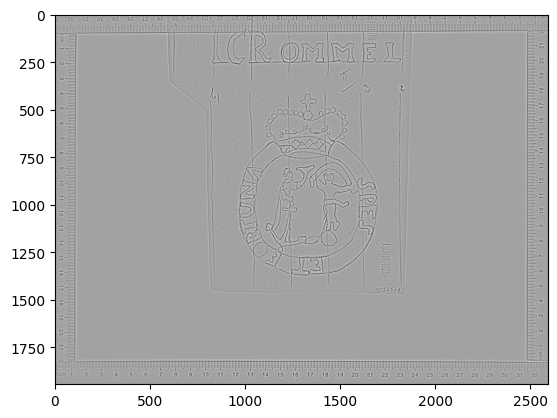

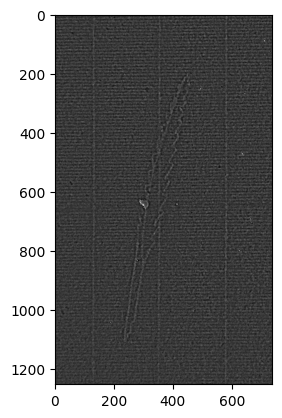

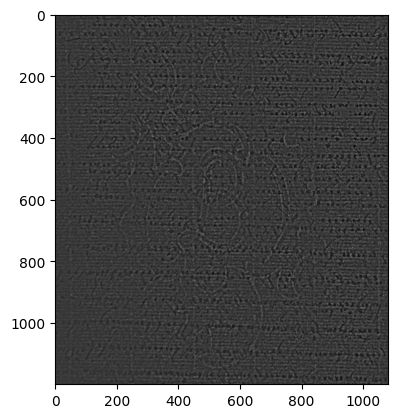

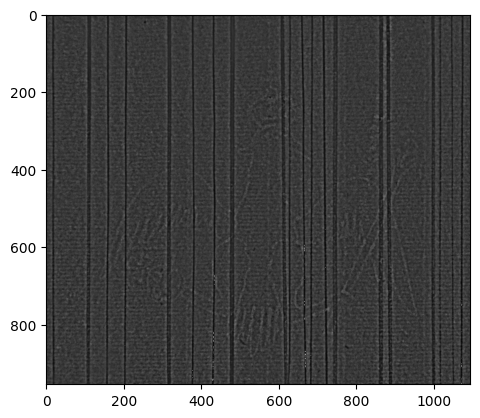

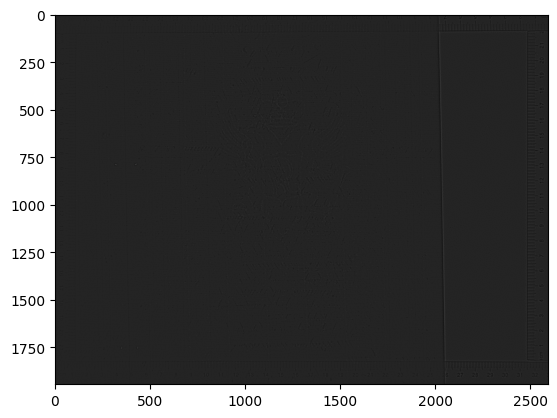

In [5]:
%matplotlib inline

IMAGE_PATH = "../"

for i in range(1, NUM_IMAGES + 1): 
    image_name = IMAGE_PATH + 'testImage' + str(i)
    if os.path.isfile(image_name + '.jpg'):
        image_name += '.jpg'
    else:
        image_name += '.png'

    image = cv2.imread(image_name)
    processed_image = process_image(image)

    if i == 2:
        cv2.imwrite("./testImage2_processed.png", processed_image)

    plt.figure()
    plt.imshow(processed_image, cmap='gray')

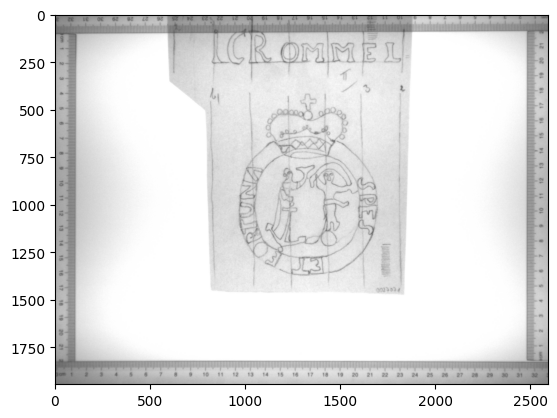

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img, (3,3), 0) 
plt.imshow(img_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


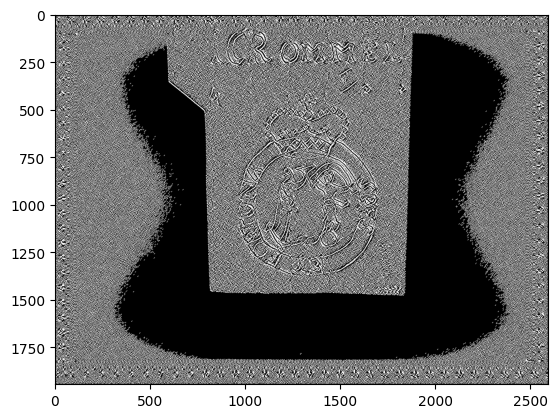

In [5]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

#plt.imshow(sobelx)
#plt.imshow(sobely)
plt.imshow(sobelxy)

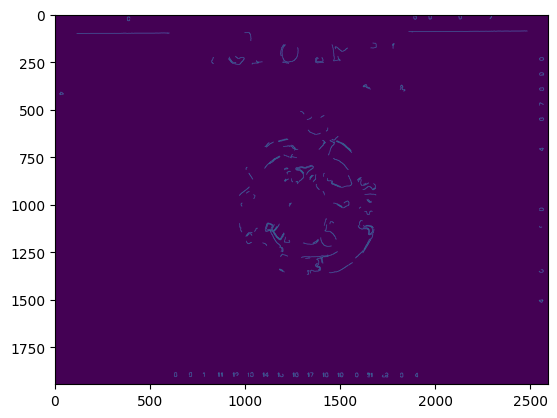

In [6]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.imshow(edges)

In [4]:
import os
import json

BATCHES_PATH = "../data-annotation/"
BATCHES_FOLDERS_START = "batch-"

annotations = []
for folder in os.listdir(BATCHES_PATH):
    if (folder.startswith(BATCHES_FOLDERS_START)):
        for filename in os.listdir(BATCHES_PATH + folder):
            if (not filename.endswith(".json")):
                continue
                
            with open(BATCHES_PATH + folder + "/" + filename, "r") as f:
                annotation_batch = json.load(f)
                annotations += annotation_batch

print(len(annotations))
print([annotation["id"] for annotation in annotations])

381
381


In [68]:
print(json.dumps(annotations[227]["annotations"][0], indent=4))

{
    "id": 225,
    "completed_by": 1,
    "result": [
        {
            "value": {
                "choices": [
                    "TOW"
                ]
            },
            "id": "vxdyF9WGmG",
            "from_name": "otherOptions",
            "to_name": "image",
            "type": "choices",
            "origin": "manual"
        },
        {
            "original_width": 2592,
            "original_height": 1944,
            "image_rotation": 0,
            "value": {
                "x": 39.220419166252555,
                "y": 13.937589431689043,
                "width": 20.4698561605096,
                "height": 43.40658578061577,
                "rotation": 0,
                "rectanglelabels": [
                    "Watermark"
                ]
            },
            "id": "-Q5_mM5nVt",
            "from_name": "label",
            "to_name": "image",
            "type": "rectanglelabels",
            "origin": "manual"
        }
    ],
    "was_cancelled

ImportError: attempted relative import with no known parent package